In [ ]:
#### MOVIE RECOMMENDATION SYSTEM #### 

In [97]:
## DATASET : MOVIE LENS
## from kaggle

In [98]:
## this is a simple movie recommendation system

In [ ]:
#Content based recommendation sytem

In [1]:
import numpy as np

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

In [5]:
#We need to form this Movie lens data into dataframe
#This contains columns as user id, item id, rating and timestamp and they are seperated by tab space 

In [12]:
column_name=['userid','item_id','rating','timestamp']

In [13]:
movie=pd.read_csv('u.data',sep='\t',names=column_name)

In [14]:
movie.head()

,userid,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [15]:
#Here we can see that some user had given rating to more than one movie

In [16]:
title = pd.read_csv("Movie_Id_Titles")

In [17]:
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [20]:
movies= pd.merge(movie,title,on='item_id')

In [21]:
movies.head()

,userid,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [22]:
# so we have merged two data's and lets explore this data

In [26]:
movies.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [28]:
movies.groupby('title')['rating'].mean().sort_values().head()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Name: rating, dtype: float64

In [29]:
movies.groupby('title')['rating'].mean().sort_values().tail()

title
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Santa with Muscles (1996)                     5.0
Prefontaine (1997)                            5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Name: rating, dtype: float64

In [30]:
#here we ccan see the movie names which are not that popular but appears to have high rating.
#because these movies are rated by single user or less number of users

In [33]:
movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [34]:
# Now we can see the best movies at the top 'STAR WARS' , 'FARGO'

In [35]:
#so now we can state that rating depends upon the number of the ratings per movie.

In [39]:
ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())

In [41]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
ratings['count'] = pd.DataFrame(movies.groupby('title')['rating'].count())

In [43]:
ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [45]:
# So now we have got ratings, title and the number of ratings per movie in a seperate dataframe

In [46]:
# lets analyse this dataframe

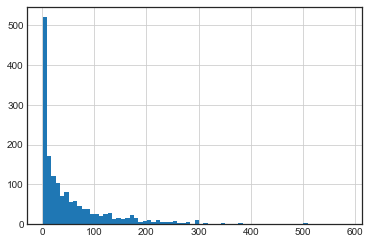

In [48]:
ratings['count'].hist(bins=70)

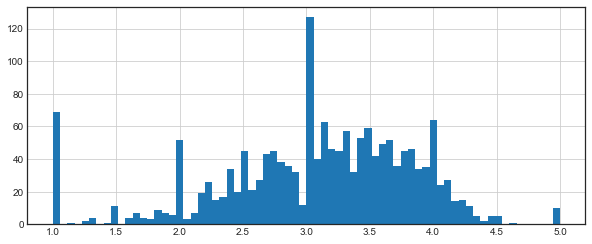

In [49]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


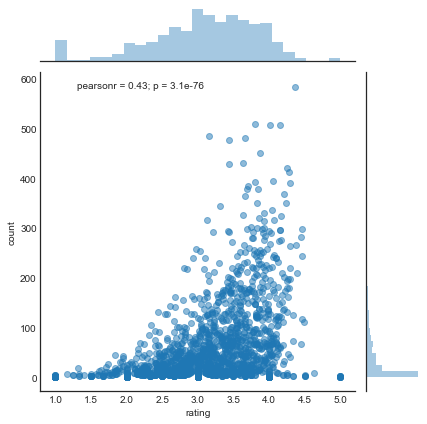

In [57]:
sns.jointplot(x='rating',y='count',data=ratings,alpha=0.5)

In [59]:
moviemat = movies.pivot_table(index='userid',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#most rated movie
ratings.sort_values('count',ascending=False).head(10)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [62]:
#Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [63]:
starwars = moviemat['Star Wars (1977)']
liarliar = moviemat['Liar Liar (1997)']

starwars.head()

userid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [64]:
similar_to_starwars = moviemat.corrwith(starwars)
similar_to_liarliar = moviemat.corrwith(liarliar)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [65]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [66]:
# This doesnt show us the correct results beacause there are a lot of movies only watched once by users who also watched star wars

In [67]:
# for this we need to make ratings count greater than 100

In [69]:
corr_starwars = corr_starwars.join(ratings['count'])
corr_starwars.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [71]:
corr_starwars[corr_starwars['count']>100].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [72]:
## This shows us the best recommendation for star wars movie.

In [73]:
#first 4 are star war movies

In [74]:
#now lets do the same for movie => liar liar

In [91]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['count'])
corr_liarliar[corr_liarliar['count']>200].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Liar Liar (1997),1.000000,485
Indiana Jones and the Last Crusade (1989),0.414427,331
Top Gun (1986),0.405720,220
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261


In [92]:
# this doesnt show us the required recommended movies for liar liar(comedy movie, starring 'Jim Carrey)

In [93]:
# Lets alter the count to get the best suggetions

In [95]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['count'])
corr_liarliar[corr_liarliar['count']>90].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101


In [96]:
# Bean , the Mask , down periscope are the comedy movies, but the best suggetion is 'the mask'(comedy , starring- Jim Carrey)